# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [4]:
project_data = pd.read_csv('train_data.csv', nrows = 50000)

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
resource_data = pd.read_csv('resources.csv')

In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column ext dataframe: 
project_data['essay'] = project_data['project_essay_1'].map(str) +\
                        project_data['project_essay_2'].map(str) + \
                        project_data['project_essay_3'].map(str) + \
                        project_data['project_essay_4'].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:17<00:00, 644.13it/s]


In [20]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
# similarly you can preprocess the titles also

In [19]:
sent = decontracted(project_data['project_title'].values[0])
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Educational Support for English Learners at Home


In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 13045.27it/s]


Introducing New Features¶

Consider these set of features for Set 5 in Assignment:
categorical dataschool_state clean_categories....clean_subcategories....project_grade_category....teacher_prefix
numerical data quantity....teacher_number_of_previously_posted_projects....price
New Features
sentiment score's of each of the essay : numerical data 
number of words in the title : numerical data 
number of words in the combine essays : numerical data 

In [21]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
new_title = []
for i in tqdm(project_data['project_title']):
    j = decontracted(i)
    new_title.append(j)  

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 23321.98it/s]


In [23]:
#Introducing New Features
title_word_count = []
#for i in project_data['project_title']:
for i in tqdm(new_title):
    j = len(i.split())
    title_word_count.append(j)
    #print(j)
project_data['title_word_count'] = title_word_count

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 498616.72it/s]


In [24]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  
0  My students are English learners that are work...                 7  
1  Our students arrive to our school eager to lea...                 5

In [25]:
new_essay = []
for i in tqdm(project_data['essay']):
    j = decontracted(i)
    new_essay.append(j)  

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 19709.52it/s]


In [26]:
essay_word_count = []
for i in tqdm(new_essay):
    j = len(i.split())
    essay_word_count.append(j)
    #print(j)
project_data['essay_word_count'] = essay_word_count

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 14621.77it/s]


In [30]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  \
0  My students are English learners that are work...                 7   
1  Our students arrive to our school eager to lea...                 5   

   essay_word_count  
0               275  
1               221

In [31]:
#Computing Sentiment Scores

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.109, neu: 0.693, pos: 0.198, compound: 0.2023, 

In [28]:

SID = SentimentIntensityAnalyzer()
#There is NEGITIVE and POSITIVE and NEUTRAL and COMPUND SCORES
#http://www.nltk.org/howto/sentiment.html
    
negitive = []
positive = []
neutral = []
compound = []
for i in tqdm(project_data['essay']):
    j = SID.polarity_scores(i)['neg']
    k = SID.polarity_scores(i)['neu']
    l = SID.polarity_scores(i)['pos']
    m = SID.polarity_scores(i)['compound']
    negitive.append(j)
    positive.append(k)
    neutral.append(l)
    compound.append(m)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [28:14<00:00, 29.51it/s]


In [29]:
project_data['negitive'] = negitive
project_data['positive'] = positive
project_data['neutral'] = neutral
project_data['compound'] = compound

In [30]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2  ... project_is_approved  \
0  \"The limits of your language are the limits o...  ...                   0   
1  The projector we need for our school is very c...  ...                   1   
2  The students on the campus come to school know...  ...                   0   
3  My students live in high poverty conditions wi...  ...                   1   
4  For many students, math is a subject that does...  ...                   1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                               essay  title_word_count  \
0  My students are English learners that are work...                 7   
1  Our students arrive to our school eager to lea...                 5   
2  \r\n\"True champions aren't always the ones th...                 7   
3  I work at a unique school filled with both ESL...                 2   
4  Our second grade classroom next year will be m...                 3   

  essay_word_count negitive positive  neutral  compound  
0              275    0.008    0.911    0.081    0.9611  
1              221    0.037    0.851    0.112    0.9267  
2              362    0.058    0.764    0.179    0.9950  
3              214    0.052    0.733    0.214    0.9931  
4              236    0.016    0.897    0.087    0.9192  

[5 rows x 24 columns]

## 1.5 Preparing data for models

In [31]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#Splitting data into Train and cross validation
# split the data set into train and test
x_train, x_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'],
                                                    test_size = 0.33, stratify = project_data['project_is_approved'],
                                                    random_state = 42)
# split the train data set into cross validation train and cross validation test
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = 0.33, stratify = y_train,
                                                random_state = 42)

In [35]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_cv.shape,y_cv.shape)

(22445, 24) (22445,)
(16500, 24) (16500,)
(11055, 24) (11055,)


In [36]:
print(x_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')


In [37]:
#Dropping Class Label in train test and cv data
x_train.drop(["project_is_approved"], axis = 1, inplace = True)
x_test.drop(["project_is_approved"], axis = 1, inplace = True)
x_cv.drop(["project_is_approved"], axis = 1, inplace = True)

In [42]:
#preprocessing of train ,cross validation and test essay data  

In [38]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay_train_data = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280aq`
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay_train_data.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [00:49<00:00, 455.01it/s]


In [39]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay_test_data = []
# tqdm is for printing the status bar
for sentance in tqdm(x_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay_test_data.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:31<00:00, 520.48it/s]


In [40]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay_cv_data = []
# tqdm is for printing the status bar
for sentance in tqdm(x_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay_cv_data.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:22<00:00, 487.58it/s]


In [46]:
#preprocessing of x_train,x_cv and x_test of project title

In [41]:
# Combining all the above statemennts of x_train
from tqdm import tqdm
train_preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    train_preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:02<00:00, 10215.62it/s]


In [42]:
# Combining all the above statemennts x_cv
from tqdm import tqdm
cv_preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(x_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    cv_preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:01<00:00, 10052.59it/s]


In [43]:
# Combining all the above statemennts x_cv
from tqdm import tqdm
test_preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(x_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    test_preprocessed_project_title.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 9704.27it/s]


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [50]:
#vectorisation of clean categories

In [44]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vect_categories= CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vect_categories.fit(project_data['clean_categories'].values)

train_categories_one_hot=vect_categories.transform(x_train['clean_categories'].values)
cv_categories_one_hot=vect_categories.transform(x_cv['clean_categories'].values)
test_categories_one_hot=vect_categories.transform(x_test['clean_categories'].values)

print(vect_categories.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig  (22445, 9)
Shape of train matrix after one hot encodig  (11055, 9)
Shape of train matrix after one hot encodig  (16500, 9)


In [45]:
cat_feature=vect_categories.get_feature_names()
len(cat_feature)

9

In [53]:
#vectorisation of clean subcategories

In [46]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_subcategories= CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategories.fit(project_data['clean_subcategories'].values)

train_subcategories_one_hot=vectorizer_subcategories.transform(x_train['clean_subcategories'].values)
cv_subcategories_one_hot=vectorizer_subcategories.transform(x_cv['clean_subcategories'].values)
test_subcategories_one_hot=vectorizer_subcategories.transform(x_test['clean_subcategories'].values)

print(vectorizer_subcategories.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_subcategories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig  (22445, 30)
Shape of train matrix after one hot encodig  (11055, 30)
Shape of train matrix after one hot encodig  (16500, 30)


In [47]:
subcat_feature=vectorizer_subcategories.get_feature_names()
len(subcat_feature)

30

In [56]:
# Build the data matrix using these features-- school_state : categorical data (one hot encoding)
##Encoding for school state 

In [48]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_state = dict(my_counter)
sorted_cat_dict_state = dict(sorted(cat_dict_state.items(), key=lambda kv: kv[1]))


from sklearn.feature_extraction.text import CountVectorizer
vectorizer_state = CountVectorizer(vocabulary=list(sorted_cat_dict_state.keys()), lowercase=False, binary=True)
vectorizer_state.fit(project_data['school_state'].values)

train_state_one_hot=vectorizer_state.transform(x_train['school_state'].values)
cv_state_one_hot=vectorizer_state.transform(x_cv['school_state'].values)
test_state_one_hot=vectorizer_state.transform(x_test['school_state'].values)

print(vectorizer_state.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_state_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_state_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'CT', 'TN', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of train matrix after one hot encodig  (22445, 51)
Shape of train matrix after one hot encodig  (11055, 51)
Shape of train matrix after one hot encodig  (16500, 51)


In [49]:
state_feature=vectorizer_state.get_feature_names()
len(state_feature)

51

In [59]:
#Encoding for project_grade_category

In [50]:
project_data.project_grade_category = project_data.project_grade_category.str.replace('\s+', '_')
project_data.project_grade_category = project_data.project_grade_category.str.replace('-', '_')
project_data['project_grade_category'].value_counts()

Grades_PreK_2    20316
Grades_3_5       16968
Grades_6_8        7750
Grades_9_12       4966
Name: project_grade_category, dtype: int64

In [51]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category']:
    my_counter.update(word.split())
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_grade = dict(my_counter)
sorted_cat_dict_grade = dict(sorted(cat_dict_grade.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict_grade)

# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_grade_cat = CountVectorizer(vocabulary=list(sorted_cat_dict_grade.keys()), lowercase=False, binary=True)
vectorizer_grade_cat.fit(project_data['project_grade_category'].values)

train_grade_one_hot=vectorizer_grade_cat.transform(x_train['project_grade_category'].values)
cv_grade_one_hot=vectorizer_grade_cat.transform(x_cv['project_grade_category'].values)
test_grade_one_hot=vectorizer_grade_cat.transform(x_test['project_grade_category'].values)

print(vectorizer_grade_cat.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_grade_one_hot.shape)

{'Grades_9_12': 4966, 'Grades_6_8': 7750, 'Grades_3_5': 16968, 'Grades_PreK_2': 20316}
['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']
Shape of train matrix after one hot encodig  (22445, 4)
Shape of train matrix after one hot encodig  (11055, 4)
Shape of train matrix after one hot encodig  (16500, 4)


In [52]:
grade_feature=vectorizer_grade_cat.get_feature_names()
len(grade_feature)

4

In [63]:
#Encoding for teacher_prefix 

In [53]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna("")

In [55]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix']:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_prefix = dict(my_counter)
sorted_cat_dict_prefix = dict(sorted(cat_dict_prefix.items(), key=lambda kv: kv[1]))


# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_teacher_prefix = CountVectorizer(vocabulary=list(sorted_cat_dict_prefix.keys()), lowercase=False, binary=True)
vectorizer_teacher_prefix.fit(project_data['teacher_prefix'].values.astype('U'))

train_teacher_prefix_one_hot=vectorizer_teacher_prefix.transform(x_train['teacher_prefix'].values.astype('U'))
cv_teacher_prefix_one_hot=vectorizer_teacher_prefix.transform(x_cv['teacher_prefix'].values.astype('U'))
test_teacher_prefix_one_hot=vectorizer_teacher_prefix.transform(x_test['teacher_prefix'].values.astype('U'))

print(vectorizer_teacher_prefix.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_teacher_prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of train matrix after one hot encodig  (22445, 5)
Shape of train matrix after one hot encodig  (11055, 5)
Shape of train matrix after one hot encodig  (16500, 5)


In [56]:
teacher_feature=vectorizer_teacher_prefix.get_feature_names()
len(teacher_feature)

5

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [57]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay_bow = CountVectorizer(min_df=10)
vectorizer_essay_bow.fit(preprocessed_essay_train_data)

text_bow_essays_train = vectorizer_essay_bow.transform(preprocessed_essay_train_data)
print("Shape of matrix after one hot encodig ",text_bow_essays_train.shape)

Shape of matrix after one hot encodig  (22445, 8869)


In [58]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
text_bow_essays_cv = vectorizer_essay_bow.transform(preprocessed_essay_cv_data)
print("Shape of matrix after one hot encodig ",text_bow_essays_cv.shape)

Shape of matrix after one hot encodig  (11055, 8869)


In [59]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
text_bow_essays_test= vectorizer_essay_bow.transform(preprocessed_essay_test_data)
print("Shape of matrix after one hot encodig ",text_bow_essays_test.shape)

Shape of matrix after one hot encodig  (16500, 8869)


In [60]:
bow_eassay_feature=vectorizer_essay_bow.get_feature_names()
len(bow_eassay_feature)

8869

In [71]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [61]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(train_preprocessed_project_title)

text_bow_title_train= vectorizer_bow_title.transform(train_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_bow_title_train.shape)

Shape of matrix after one hot encodig  (22445, 1229)


In [62]:
text_bow_title_cv=vectorizer_bow_title.transform(cv_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_bow_title_cv.shape)

Shape of matrix after one hot encodig  (11055, 1229)


In [63]:
text_bow_title_test= vectorizer_bow_title.transform(test_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_bow_title_test.shape)

Shape of matrix after one hot encodig  (16500, 1229)


In [64]:
bow_title_feature=vectorizer_bow_title.get_feature_names()
len(bow_title_feature)

1229

#### 1.5.2.2 TFIDF vectorizer

In [65]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_project_title)

text_tfidf_title_train = vectorizer.transform(train_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title_train.shape)

Shape of matrix after one hot encodig  (22445, 1229)


In [66]:
# Similarly you can vectorize for title 
text_tfidf_title_cv = vectorizer.transform(cv_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title_cv.shape)

Shape of matrix after one hot encodig  (11055, 1229)


In [67]:
# Similarly you can vectorize for title also
text_tfidf_title_test = vectorizer.transform(test_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title_test.shape)

Shape of matrix after one hot encodig  (16500, 1229)


In [68]:
title_tfidf_feature=vectorizer.get_feature_names()
len(title_tfidf_feature)

1229

# TFIDF Vectorizer on preprocessed essay

In [69]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(preprocessed_essay_train_data)

tfidf_essay_train = vectorizer.transform(preprocessed_essay_train_data)
print("Shape of matrix after one hot encodig ",tfidf_essay_train.shape)

Shape of matrix after one hot encodig  (22445, 8869)


In [70]:
# Similarly you can vectorize for title also
tfidf_essay_cv = vectorizer.transform(preprocessed_essay_cv_data)
print("Shape of matrix after one hot encodig ",tfidf_essay_cv.shape)

Shape of matrix after one hot encodig  (11055, 8869)


In [71]:
tfidf_essay_test = vectorizer.transform(preprocessed_essay_test_data)
print("Shape of matrix after one hot encodig ",tfidf_essay_test.shape)

Shape of matrix after one hot encodig  (16500, 8869)


In [72]:
tfidf_essay_feature=vectorizer.get_feature_names()
len(tfidf_essay_feature)

8869

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [77]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [79]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [80]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essay_train_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_train_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_train_data.append(vector)

print(len(avg_w2v_essay_train_data))
print(len(avg_w2v_essay_train_data[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:21<00:00, 1067.65it/s]


22445
300


In [81]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essay_cv_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_cv_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_cv_data.append(vector)

print(len(avg_w2v_essay_cv_data))
print(len(avg_w2v_essay_cv_data[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:15<00:00, 722.20it/s]


11055
300


In [82]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essay_test_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_test_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_test_data.append(vector)

print(len(avg_w2v_essay_test_data))
print(len(avg_w2v_essay_test_data[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:15<00:00, 1046.32it/s]


16500
300


In [90]:
#Using Pretrained Models: Avg W2V for project title

In [84]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_project_title_train_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_train_data.append(vector)

print(len(avg_w2v_project_title_train_data))
print(len(avg_w2v_project_title_train_data[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 18807.35it/s]


22445
300


In [85]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_project_title_cv_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_cv_data.append(vector)

print(len(avg_w2v_project_title_cv_data))
print(len(avg_w2v_project_title_cv_data[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 20605.01it/s]


11055
300


In [86]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_project_title_test_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_test_data.append(vector)

print(len(avg_w2v_project_title_test_data))
print(len(avg_w2v_project_title_test_data[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 19848.33it/s]


16500
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [88]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essay_train_data)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [89]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_train_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_train_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train_data.append(vector)

print(len(tfidf_w2v_essay_train_data))
print(len(tfidf_w2v_essay_train_data[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [02:33<00:00, 146.49it/s]


22445
300


In [90]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_cv_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_cv_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_cv_data.append(vector)

print(len(tfidf_w2v_essay_cv_data))
print(len(tfidf_w2v_essay_cv_data[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [01:20<00:00, 137.30it/s]


11055
300


In [91]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_test_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_test_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test_data.append(vector)

print(len(tfidf_w2v_essay_test_data))
print(len(tfidf_w2v_essay_test_data[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [02:04<00:00, 132.35it/s]


16500
300


In [98]:
# Similarly you can vectorize for title also

In [92]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_preprocessed_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [93]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_project_title_train_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_project_title_train_data.append(vector)

print(len(tfidf_w2v_project_title_train_data ))
print(len(tfidf_w2v_project_title_train_data [0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:02<00:00, 8191.13it/s]


22445
300


In [94]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_project_title_cv_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_project_title_cv_data.append(vector)

print(len(tfidf_w2v_project_title_cv_data))
print(len(tfidf_w2v_project_title_cv_data[0]))

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:01<00:00, 9044.82it/s]


11055
300


In [95]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_project_title_test_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_project_title_test_data.append(vector)

print(len(tfidf_w2v_project_title_test_data))
print(len(tfidf_w2v_project_title_test_data[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 9483.00it/s]


16500
300


In [96]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [97]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades_PreK_2   
1           FL        2016-10-25 09:22:10             Grades_6_8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ...  \
0  \"The limits of your language are the limits o...  ...   
1  The projector we need for our school is very c...  ...   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   

                                               essay title_word_count  \
0  My students are English learners that are work...                7   
1  Our students arrive to our school eager to lea...                5   

   essay_word_count  negitive positive neutral compound  price  quantity  
0               275     0.008    0.911   0.081   0.9611  154.6        23  
1               221     0.037    0.851   0.112   0.9267  299.0         1  

[2 rows x 26 columns]

In [98]:
x_train = pd.merge(x_train, price_data, on = "id", how = "left")
x_test = pd.merge(x_test, price_data, on = "id", how = "left")
x_cv = pd.merge(x_cv, price_data, on = "id", how = "left")

In [99]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'title_word_count', 'essay_word_count',
       'negitive', 'positive', 'neutral', 'compound', 'price', 'quantity'],
      dtype='object')

# Standardize Price

In [100]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()

price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_price_standar = price_scalar.transform(x_train['price'].values.reshape(-1, 1))

price_scalar.fit(x_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_price_standar = price_scalar.transform(x_test['price'].values.reshape(-1, 1))

price_scalar.fit(x_cv['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_price_standar = price_scalar.transform(x_cv['price'].values.reshape(-1, 1))

TRAIN -> Mean : 297.71562753397194, Standard deviation : 373.5890845438879
TEST -> Mean : 301.40470666666664, Standard deviation : 387.6948484063583
CV -> Mean : 299.52771506105836, Standard deviation : 373.1478347400019


In [101]:
print(train_price_standar.shape, y_train.shape)
print(test_price_standar.shape, y_test.shape)
print(cv_price_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


In [102]:
print(price_scalar.get_params)

<bound method BaseEstimator.get_params of StandardScaler(copy=True, with_mean=True, with_std=True)>


# teacher_number_of_previously_posted_projects

In [103]:
warnings.filterwarnings("ignore")
price_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_prev_proj_standar = price_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

price_scalar.fit(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_prev_proj_standar = price_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

price_scalar.fit(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_prev_proj_standar = price_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

TRAIN -> Mean : 11.66473602138561, Standard deviation : 29.394684894505467
TEST -> Mean : 10.824363636363636, Standard deviation : 26.94848396907338
CV -> Mean : 11.040253279059248, Standard deviation : 27.32928192601594


In [104]:
print(train_prev_proj_standar.shape, y_train.shape)
print(test_prev_proj_standar.shape, y_test.shape)
print(cv_prev_proj_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


In [105]:
print(price_scalar.get_params)

<bound method BaseEstimator.get_params of StandardScaler(copy=True, with_mean=True, with_std=True)>


# Standardize Quantity

In [106]:
price_scalar.fit(x_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_quantity_standar = price_scalar.transform(x_train['quantity'].values.reshape(-1, 1))

price_scalar.fit(x_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_quantity_standar = price_scalar.transform(x_test['quantity'].values.reshape(-1, 1))

price_scalar.fit(x_cv['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_quantity_standar = price_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))

TRAIN -> Mean : 17.001470260637113, Standard deviation : 26.03701886058425
TEST -> Mean : 17.05290909090909, Standard deviation : 27.494020077501187
CV -> Mean : 17.173224785165083, Standard deviation : 27.30705061932881


In [107]:
print(train_quantity_standar.shape, y_train.shape)
print(test_quantity_standar.shape, y_test.shape)
print(cv_quantity_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


In [115]:
#standerdrise the tittle word count

In [108]:
title_scalar = StandardScaler()
title_scalar.fit(x_train['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
train_title_word_count_standar = title_scalar.transform(x_train['title_word_count'].values.reshape(-1, 1))

title_scalar.fit(x_test['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
test_title_word_count_standar = title_scalar.transform(x_test['title_word_count'].values.reshape(-1, 1))

title_scalar.fit(x_cv['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
cv_title_word_count_standar = title_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))

print(train_title_word_count_standar.shape, y_train.shape)
print(test_title_word_count_standar.shape, y_test.shape)
print(cv_title_word_count_standar.shape, y_cv.shape)

Mean : 5.215103586544887, Standard deviation : 27.30705061932881
Mean : 5.2118787878787876, Standard deviation : 27.30705061932881
Mean : 5.2236996834011755, Standard deviation : 27.30705061932881
(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


In [117]:
#standerise the essay wordcount

In [109]:
essay_scalar = StandardScaler()

essay_scalar.fit(x_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_essay_word_count_standar = essay_scalar.transform(x_train['essay_word_count'].values.reshape(-1, 1))

essay_scalar.fit(x_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_essay_word_count_standar = essay_scalar.transform(x_test['essay_word_count'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_essay_word_count_standar = essay_scalar.transform(x_cv['essay_word_count'].values.reshape(-1, 1))

print(train_essay_word_count_standar.shape, y_train.shape)
print(test_essay_word_count_standar.shape, y_test.shape)
print(cv_essay_word_count_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


In [119]:
#standerise  Positive Intensity

In [110]:
essay_scalar.fit(x_train['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_positive_standar = essay_scalar.transform(x_train['positive'].values.reshape(-1, 1))

essay_scalar.fit(x_train['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_positive_standar = essay_scalar.transform(x_test['positive'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_positive_standar = essay_scalar.transform(x_cv['positive'].values.reshape(-1, 1))

print(train_positive_standar.shape, y_train.shape)
print(test_positive_standar.shape, y_test.shape)
print(cv_positive_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


In [111]:
#standerise  negative Intensity

In [112]:
essay_scalar.fit(x_train['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_negitive_standar = essay_scalar.transform(x_train['negitive'].values.reshape(-1, 1))

essay_scalar.fit(x_train['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_negitive_standar = essay_scalar.transform(x_test['negitive'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_negitive_standar = essay_scalar.transform(x_cv['negitive'].values.reshape(-1, 1))

print(train_negitive_standar.shape, y_train.shape)
print(test_negitive_standar.shape, y_test.shape)
print(cv_negitive_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


In [123]:
#Standardize Neutral Intensity

In [113]:
essay_scalar.fit(x_train['neutral'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_neutral_standar = essay_scalar.transform(x_train['neutral'].values.reshape(-1, 1))

essay_scalar.fit(x_train['neutral'].values.reshape(-1,1))
test_neutral_standar = essay_scalar.transform(x_test['neutral'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['neutral'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_neutral_standar = essay_scalar.transform(x_cv['neutral'].values.reshape(-1, 1))

print(train_neutral_standar.shape, y_train.shape)
print(test_neutral_standar.shape, y_test.shape)
print(cv_neutral_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


In [125]:
#merging all data together

In [114]:
print("Shape of train matrix after one hot encodig ",train_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_categories_one_hot.shape)

print("Shape of train matrix after one hot encodig ",train_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_subcategories_one_hot.shape)

print("Shape of train matrix after one hot encodig ",train_state_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_state_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_state_one_hot.shape)

print("Shape of train matrix after one hot encodig ",train_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_grade_one_hot.shape)

print("Shape of train matrix after one hot encodig ",train_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_teacher_prefix_one_hot.shape)

print("Shape of matrix after one hot encodig ",text_bow_essays_train.shape)
print("Shape of matrix after one hot encodig ",text_bow_essays_cv.shape)
print("Shape of matrix after one hot encodig ",text_bow_essays_test.shape)

print("Shape of matrix after one hot encodig ",text_bow_title_train.shape)
print("Shape of matrix after one hot encodig ",text_bow_title_cv.shape)
print("Shape of matrix after one hot encodig ",text_bow_title_test.shape)

print("Shape of matrix after one hot encodig ",text_tfidf_title_train.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_title_cv.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_title_test.shape)

print("Shape of matrix after one hot encodig ",tfidf_essay_train.shape)
print("Shape of matrix after one hot encodig ",tfidf_essay_cv.shape)
print("Shape of matrix after one hot encodig ",tfidf_essay_test.shape)

Shape of train matrix after one hot encodig  (22445, 9)
Shape of train matrix after one hot encodig  (11055, 9)
Shape of train matrix after one hot encodig  (16500, 9)
Shape of train matrix after one hot encodig  (22445, 30)
Shape of train matrix after one hot encodig  (11055, 30)
Shape of train matrix after one hot encodig  (16500, 30)
Shape of train matrix after one hot encodig  (22445, 51)
Shape of train matrix after one hot encodig  (11055, 51)
Shape of train matrix after one hot encodig  (16500, 51)
Shape of train matrix after one hot encodig  (22445, 4)
Shape of train matrix after one hot encodig  (11055, 4)
Shape of train matrix after one hot encodig  (16500, 4)
Shape of train matrix after one hot encodig  (22445, 5)
Shape of train matrix after one hot encodig  (11055, 5)
Shape of train matrix after one hot encodig  (16500, 5)
Shape of matrix after one hot encodig  (22445, 8869)
Shape of matrix after one hot encodig  (11055, 8869)
Shape of matrix after one hot encodig  (16500, 8

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [127]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [128]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [129]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [130]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [131]:
# Please write all the code with proper documentation

In [132]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train1 = hstack((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_prefix_one_hot,text_bow_essays_train, text_bow_title_train, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar,train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1))

(22445, 10205) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [133]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv1 = hstack((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_prefix_one_hot,text_bow_essays_cv, text_bow_title_cv, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar, cv_title_word_count_standar, 
                  cv_essay_word_count_standar, cv_positive_standar, cv_negitive_standar,
                  cv_neutral_standar)).tocsr()
print(X_cv1.shape, y_cv.shape)
print(type(X_cv1))

(11055, 10205) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [134]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test1 = hstack((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_prefix_one_hot,text_bow_essays_test, text_bow_title_test, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_title_word_count_standar, 
                  test_essay_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test1.shape, y_test.shape)
print(type(X_test1))

(16500, 10205) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [135]:
#HYperparamter tunning using Gridesearch 

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sea

In [137]:
DT = DecisionTreeClassifier( class_weight = 'balanced',random_state=0)

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
classifier.fit(X_train1, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

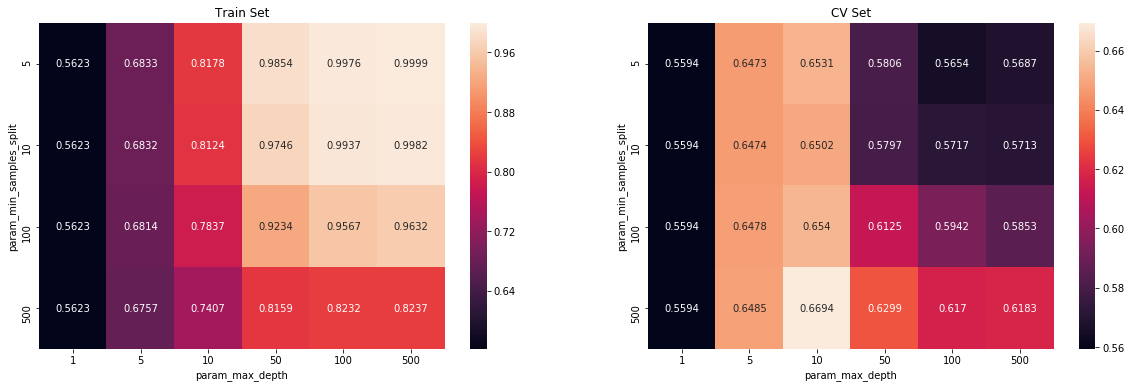

In [138]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [139]:
#traning the model using best hyper paramter

In [140]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

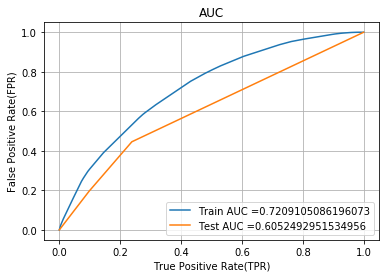

In [141]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
classifier_viz = DecisionTreeClassifier(max_depth = 2, min_samples_split = 500)

classifier.fit(X_train1, y_train)
classifier_viz.fit(X_train1, y_train)

y_train_pred = batch_predict(classifier,X_train1)    
y_test_pred = batch_predict(classifier_viz,X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [142]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.43241622312342776 for threshold 0.861
the maximum value of tpr*(1-fpr) 0.33958671973596105 for threshold 0.887


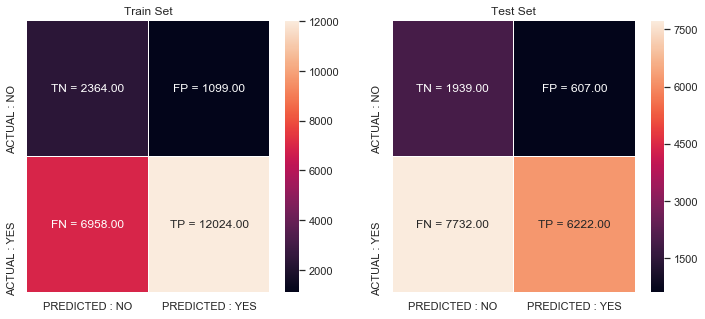

In [143]:
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [144]:
#false positive rate

In [145]:
BOW_essay_text=text_bow_essays_test.todense()
print(BOW_essay_text.shape)
len(bow_eassay_feature)

(16500, 8869)


8869

In [146]:
y_test_data = list(y_test[::])
len(y_test_data)

16500

In [147]:
fp_index = []
fp_count = 0

for i in range(len(y_test_pred)):
    if y_test_data[i] == 0 and y_test_pred[i] <= 0.9:
        fp_index.append(i)
        fp_count = fp_count + 1 
    else :
        pass
print(fp_count)

2546


In [148]:
fp_index[0:10]

[0, 2, 3, 9, 14, 15, 20, 23, 26, 43]

In [149]:
df1 = pd.DataFrame(BOW_essay_text) 

In [150]:
df1_final = df1.iloc[fp_index,:]
print(df1_final.shape)

(2546, 8869)


In [151]:
best_indices = []

for j in range(8869):    
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue   

In [152]:
len(best_indices)

598

In [153]:
best_indices[0:10] 

[3, 45, 105, 161, 162, 163, 182, 183, 194, 234]

In [156]:
%%script false
fp_words = []

for a in best_indices :
    fp_words.append(str(BOW_feature[a]))

In [159]:
fp_words[0:10]

['Music_Arts', 'SD', '11', '32', '320', '33', '44', '45', '51', '82']

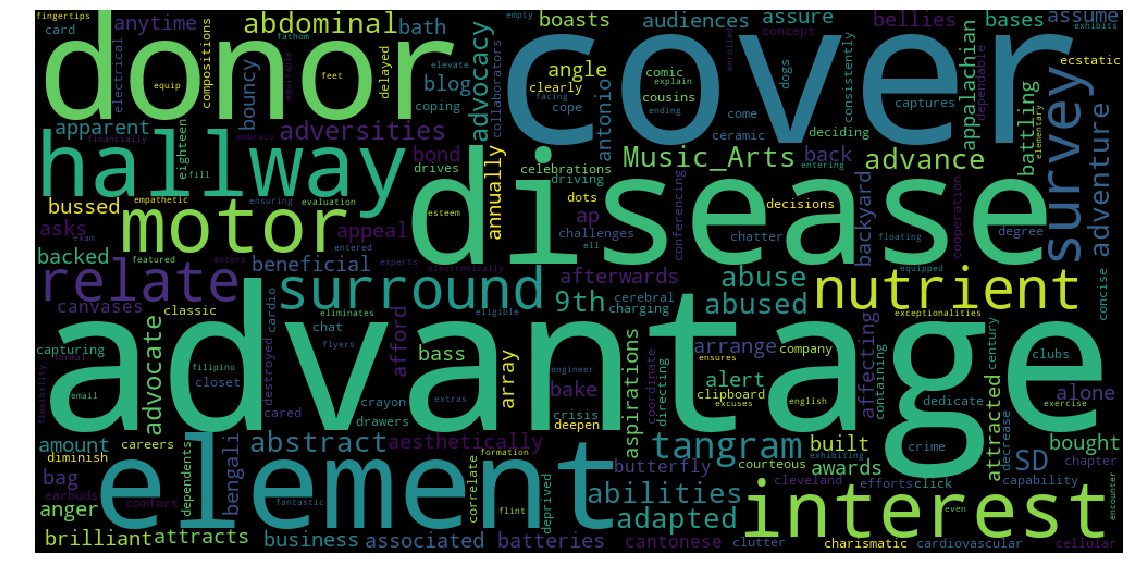

In [163]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
#convert list to string and generate
words_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# BOX & PDF plot of false postive rate

In [160]:
df = pd.DataFrame(x_test['price'])
print(df.head(2))

    price
0  337.18
1   89.49


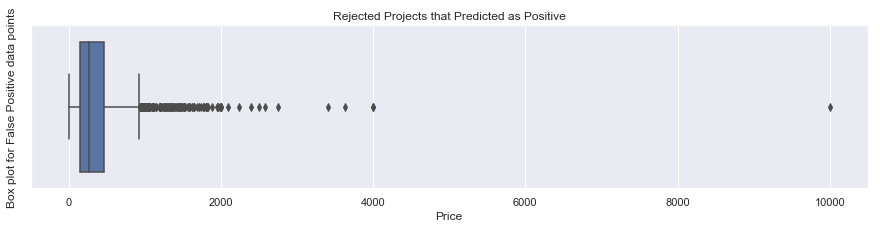

In [161]:
plt.figure(figsize=(15,3))
df1 = df.iloc[fp_index, : ]
sea.boxplot(df1.values)
plt.title("Rejected Projects that Predicted as Positive")
plt.ylabel("Box plot for False Positive data points")
plt.xlabel("Price")
plt.show()

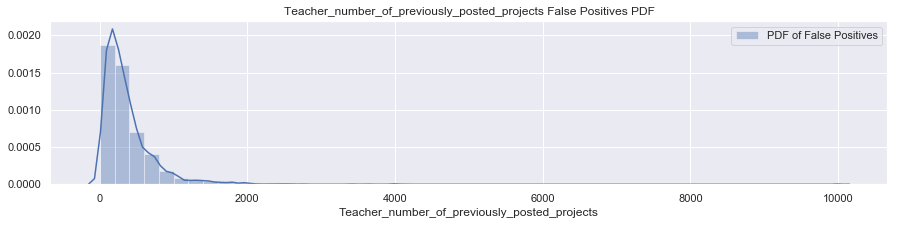

In [162]:
plt.figure(figsize=(15,3))
sns.distplot(df1.values, label="PDF of False Positives")
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [139]:
BOW_feature=cat_feature+subcat_feature+state_feature+grade_feature+teacher_feature+bow_eassay_feature+bow_title_feature

In [140]:
len(BOW_feature)

10197

In [159]:
BOW_feature.append('price') 
BOW_feature.append('teacher_number_of_previously_posted_projects')
BOW_feature.append('quantity')
BOW_feature.append('title_word_count')
BOW_feature.append('essay_word_count')
BOW_feature.append('positive')
BOW_feature.append('negitive')
BOW_feature.append('neutral')

In [160]:
len(BOW_feature)

10205

In [161]:
print(classifier_viz.n_features_)

10205


In [162]:
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(classifier_viz, out_file=None, feature_names=BOW_feature)
graph = graphviz.Source(dot_data)
graph.render("Bow tree",view = True)

'Bow tree.pdf'

In [164]:
# Please write all the code with proper documentation
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier_viz, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=BOW_feature)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf('graph1.pdf')

True

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [165]:
# Please write all the code with proper documentation

In [166]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train2 = hstack((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,
                  train_grade_one_hot,train_teacher_prefix_one_hot,tfidf_essay_train,
                  text_tfidf_title_train, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train2.shape, y_train.shape)
print(type(X_train2))

(22445, 10205) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [167]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv2 = hstack((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,
               cv_grade_one_hot,cv_teacher_prefix_one_hot,tfidf_essay_cv,
               text_tfidf_title_cv, cv_quantity_standar,
               cv_prev_proj_standar, cv_price_standar, cv_title_word_count_standar, 
               cv_essay_word_count_standar, cv_positive_standar, cv_negitive_standar,
               cv_neutral_standar)).tocsr()
print(X_cv2.shape, y_cv.shape)
print(type(X_cv2))

(11055, 10205) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [168]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test2 = hstack((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,
                  test_grade_one_hot,test_teacher_prefix_one_hot,text_tfidf_title_test,
                  tfidf_essay_test, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_title_word_count_standar, 
                  test_essay_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test2.shape, y_test.shape)
print(type(X_test2))

(16500, 10205) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sea

In [171]:
DT = DecisionTreeClassifier(class_weight='balanced',random_state=0)

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
classifier.fit(X_train2, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [172]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

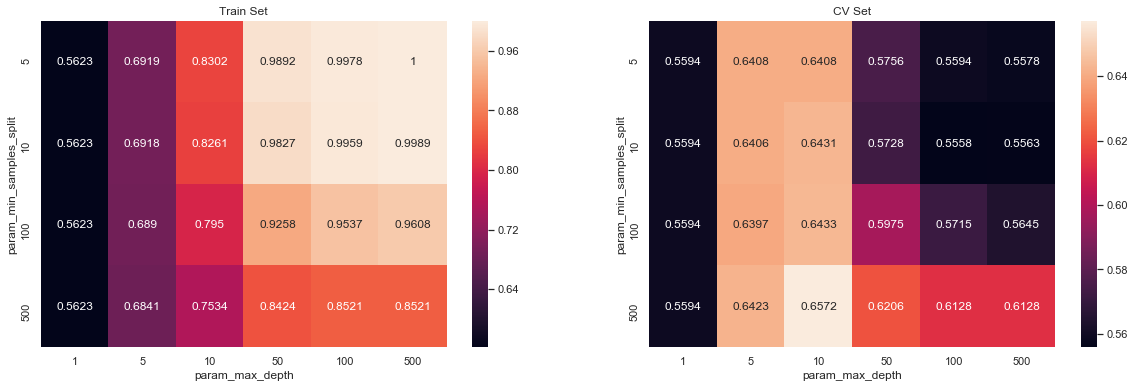

In [173]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [174]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

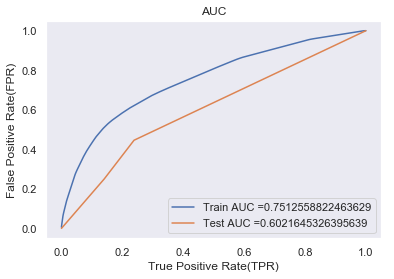

In [177]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500)
classifier_viz2 = DecisionTreeClassifier(max_depth = 2, min_samples_split = 500)

classifier2.fit(X_train2, y_train)
classifier_viz2.fit(X_train2, y_train)

y_train_pred = batch_predict(classifier,X_train2)    
y_test_pred = batch_predict(classifier_viz,X_test2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4725274788800174 for threshold 0.405
the maximum value of tpr*(1-fpr) 0.33953214134963255 for threshold 0.899


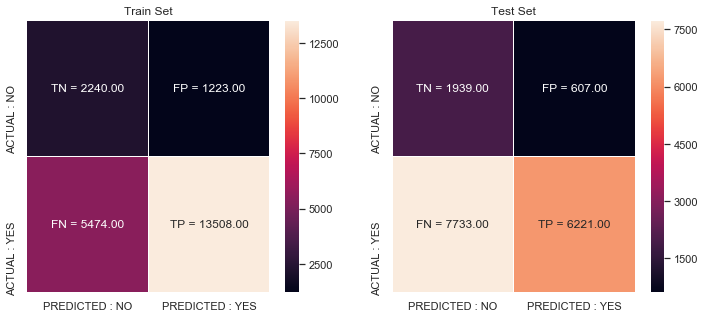

In [178]:
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [179]:
#find the false postive data points

In [180]:
BOW_essay_text=text_bow_essays_test.todense()
print(BOW_essay_text.shape)
len(bow_eassay_feature)

(16500, 8869)


8869

In [181]:
y_test_data = list(y_test[::])
len(y_test_data)

16500

In [182]:
fp_index = []
fp_count = 0

for i in range(len(y_test_pred)):
    if y_test_data[i] == 0 and y_test_pred[i] <= 0.9:
        fp_index.append(i)
        fp_count = fp_count + 1 
    else :
        pass
print(fp_count)

2188


In [183]:
df1 = pd.DataFrame(BOW_essay_text) 

In [184]:
df1_final = df1.iloc[fp_index,:]
print(df1_final.shape)

(2188, 8869)


In [185]:
for j in range(8869):    
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue  
len(best_indices)

1135

In [186]:
best_indices[0:10] 

[3, 45, 105, 161, 162, 163, 182, 183, 194, 234]

In [187]:
fp_words = []

for a in best_indices :
    fp_words.append(str(BOW_feature[a]))

fp_words[0:10]

['Music_Arts', 'SD', '11', '32', '320', '33', '44', '45', '51', '82']

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
#convert list to string and generate
words_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df = pd.DataFrame(x_test['price'])
print(df.head(2))

In [ ]:
plt.figure(figsize=(20,4))
df1 = df.iloc[fp_index, : ]
sea.boxplot(df1.values)
plt.title("Rejected Projects that Predicted as Positive")
plt.ylabel("Box plot for False Positive data points")
plt.xlabel("Price")
plt.show()

In [ ]:
plt.figure(figsize=(20,4))
sns.distplot(df1.values, label="PDF of False Positives")
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [ ]:
# Please write all the code with proper documentation

In [188]:
tfidf_feature=cat_feature+subcat_feature+state_feature+grade_feature+teacher_feature+title_tfidf_feature+tfidf_essay_feature
len(tfidf_feature)

10197

In [189]:
tfidf_feature.append('price') 
tfidf_feature.append('teacher_number_of_previously_posted_projects')
tfidf_feature.append('quantity')
tfidf_feature.append('title_word_count')
tfidf_feature.append('essay_word_count')
tfidf_feature.append('positive')
tfidf_feature.append('negitive')
tfidf_feature.append('neutral')

In [190]:
len(tfidf_feature)

10205

In [191]:
print(classifier_viz2.n_features_)

10205


In [193]:
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(classifier_viz2, out_file=None, feature_names=tfidf_feature)
graph = graphviz.Source(dot_data)
graph.render("TFIDF tree",view = True)

'TFIDF tree.pdf'

In [194]:
# Please write all the code with proper documentation
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier_viz2, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=tfidf_feature)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf('graph2.pdf')

True

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
# Please write all the code with proper documentation

In [115]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train3 = hstack((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,
                  train_grade_one_hot,train_teacher_prefix_one_hot,avg_w2v_essay_train_data,
                  avg_w2v_project_title_train_data, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train3.shape, y_train.shape)
print(type(X_train3))

(22445, 707) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [116]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv3= hstack((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,
               cv_grade_one_hot,cv_teacher_prefix_one_hot,avg_w2v_essay_cv_data,
               avg_w2v_project_title_cv_data, cv_quantity_standar,
               cv_prev_proj_standar, cv_price_standar, cv_title_word_count_standar, 
               cv_essay_word_count_standar, cv_positive_standar, cv_negitive_standar,
               cv_neutral_standar)).tocsr()
print(X_cv3.shape, y_cv.shape)
print(type(X_cv3))

(11055, 707) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [117]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test3 = hstack((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,
                  test_grade_one_hot,test_teacher_prefix_one_hot,avg_w2v_essay_test_data,
                  avg_w2v_project_title_test_data, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_title_word_count_standar, 
                  test_essay_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test3.shape, y_test.shape)
print(type(X_test3))

(16500, 707) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sea

In [120]:
DT = DecisionTreeClassifier(class_weight = 'balanced',random_state=0)

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier.fit(X_train3, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

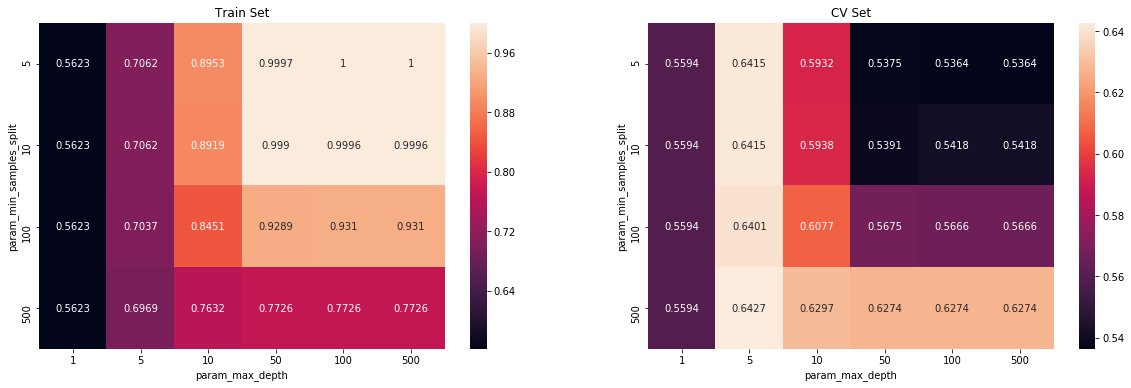

In [121]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [122]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

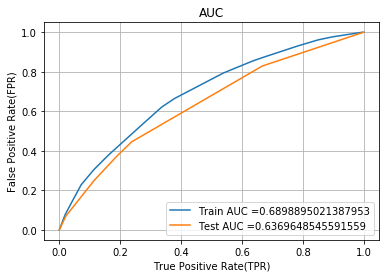

In [123]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth =5, min_samples_split = 500)
classifier_viz = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

classifier.fit(X_train3, y_train)
classifier_viz.fit(X_train3, y_train)

y_train_pred = batch_predict(classifier,X_train3)    
y_test_pred = batch_predict(classifier_viz,X_test3)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [124]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.4131448998310876 for threshold 0.883
the maximum value of tpr*(1-fpr) 0.3397072481785906 for threshold 0.867


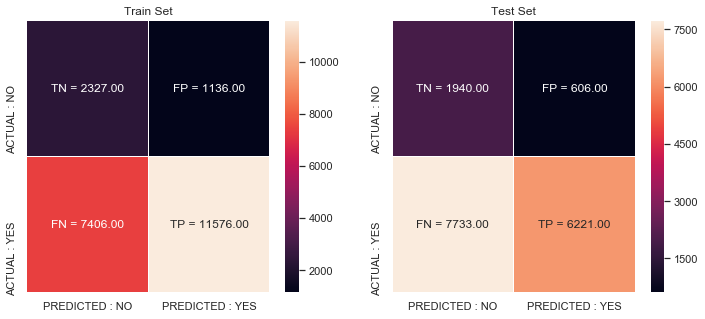

In [125]:
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [126]:
BOW_essay_text=text_bow_essays_test.todense()
print(BOW_essay_text.shape)
len(bow_eassay_feature)

(16500, 8869)


8869

In [127]:
y_test_data = list(y_test[::])
len(y_test_data)

16500

In [129]:
FP_index = []
FP_count = 0

for i in range(len(y_test_pred)):
    if y_test_data[i] == 0 and y_test_pred[i] <= 0.9:
        FP_index.append(i)
        FP_count = FP_count + 1 
    else :
        pass
print(FP_count)

FP_index[0:10]

2256


[0, 3, 9, 14, 15, 20, 23, 26, 43, 48]

In [131]:
df1 = pd.DataFrame(BOW_essay_text) 

df1_final = df1.iloc[FP_index,:]
print(df1_final.shape)

(2256, 8869)


In [135]:
 best_indices=[]

In [136]:
for j in range(8869):    
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue
len(best_indices)

554

In [137]:
best_indices[0:10] 

[3, 105, 161, 162, 163, 182, 194, 234, 255, 259]

In [141]:
fp_words = []

for a in best_indices :
    fp_words.append(str(BOW_feature[a]))

fp_words[0:10]

['Music_Arts', '11', '32', '320', '33', '44', '51', '82', '9th', 'abdominal']

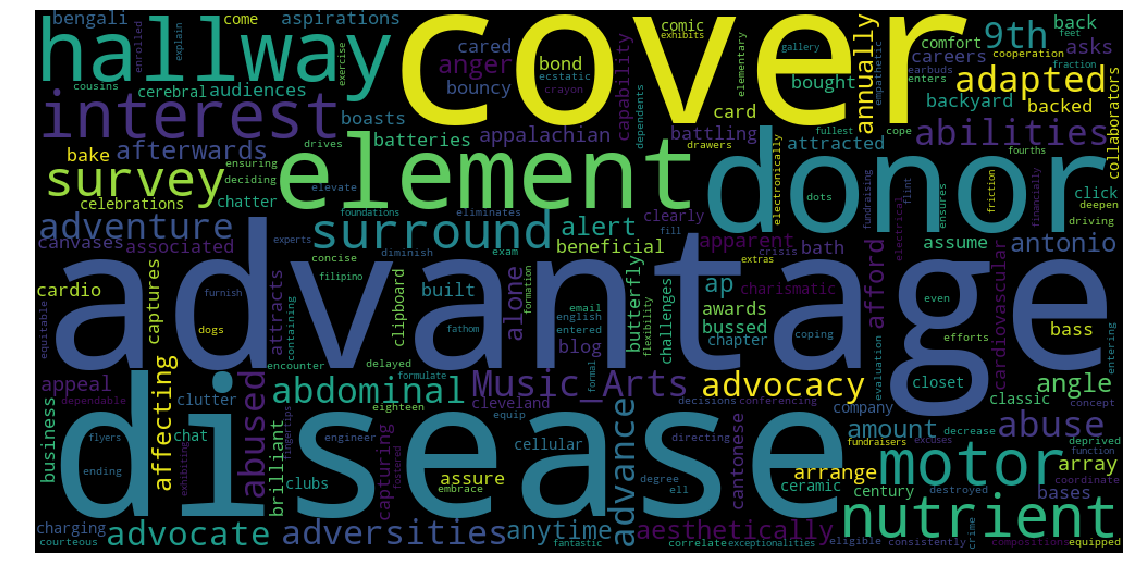

In [142]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
#convert list to string and generate
words_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [143]:
df = pd.DataFrame(x_test['price'])
print(df.head(2))

    price
0  337.18
1   89.49


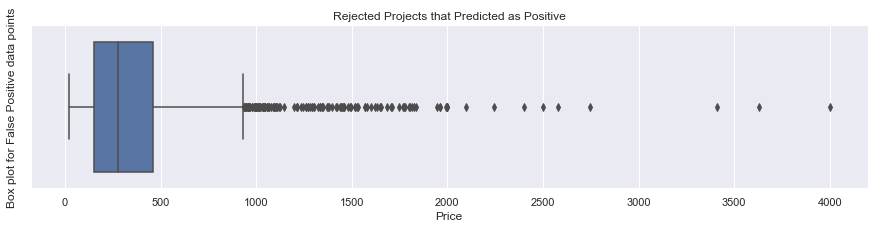

In [145]:
plt.figure(figsize=(15,3))
df1 = df.iloc[FP_index, : ]
sea.boxplot(df1.values)
plt.title("Rejected Projects that Predicted as Positive")
plt.ylabel("Box plot for False Positive data points")
plt.xlabel("Price")
plt.show()

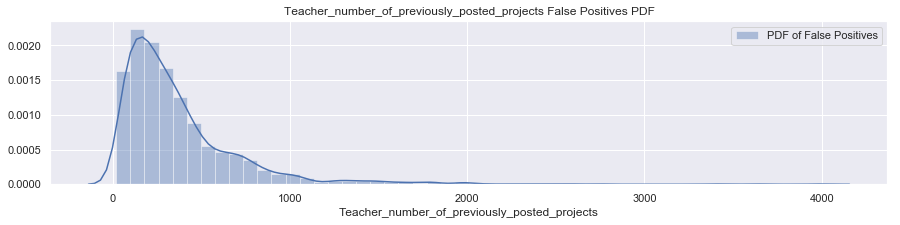

In [146]:
plt.figure(figsize=(15,3))
sns.distplot(df1.values, label="PDF of False Positives")
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [ ]:
# Please write all the code with proper documentation

In [147]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train4 = hstack((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,
                  train_grade_one_hot,train_teacher_prefix_one_hot,tfidf_w2v_essay_train_data,
                  tfidf_w2v_project_title_train_data, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train4.shape, y_train.shape)
print(type(X_train4))

(22445, 707) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [148]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv4= hstack((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,
               cv_grade_one_hot,cv_teacher_prefix_one_hot,tfidf_w2v_essay_cv_data,
               tfidf_w2v_project_title_cv_data, cv_quantity_standar,
               cv_prev_proj_standar, cv_price_standar, cv_title_word_count_standar, 
               cv_essay_word_count_standar, cv_positive_standar, cv_negitive_standar,
               cv_neutral_standar)).tocsr()
print(X_cv4.shape, y_cv.shape)
print(type(X_cv4))

(11055, 707) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [149]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test4 = hstack((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,
                  test_grade_one_hot,test_teacher_prefix_one_hot,tfidf_w2v_essay_test_data,
                  tfidf_w2v_project_title_test_data, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_title_word_count_standar, 
                  test_essay_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test4.shape, y_test.shape)
print(type(X_test4))

(16500, 707) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [150]:
DT = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier.fit(X_train4, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

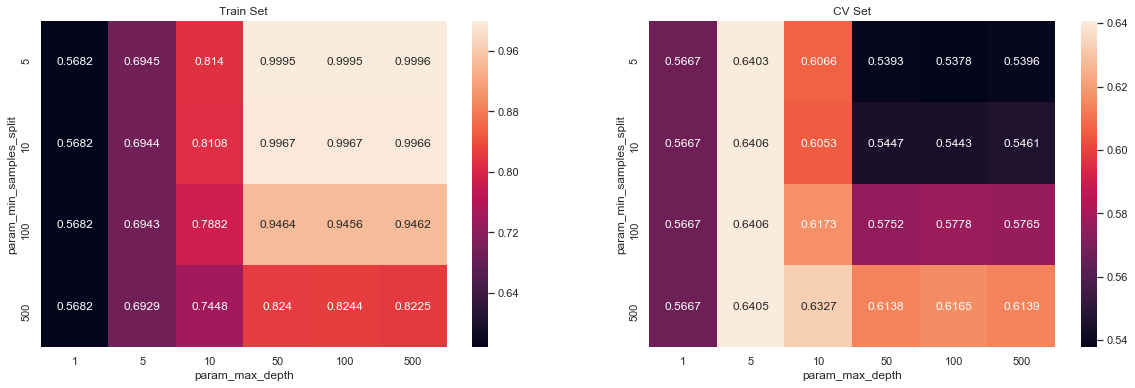

In [151]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [152]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

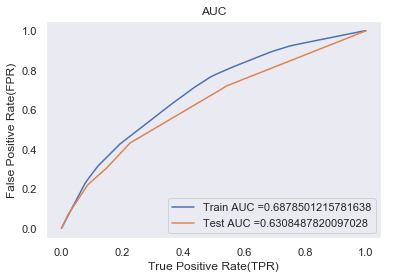

In [153]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500)
classifier_viz = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

classifier.fit(X_train4, y_train)
classifier_viz.fit(X_train4, y_train)

y_train_pred = batch_predict(classifier,X_train4)    
y_test_pred = batch_predict(classifier_viz,X_test4)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.40194389973777306 for threshold 0.867
the maximum value of tpr*(1-fpr) 0.33470877997631315 for threshold 0.839


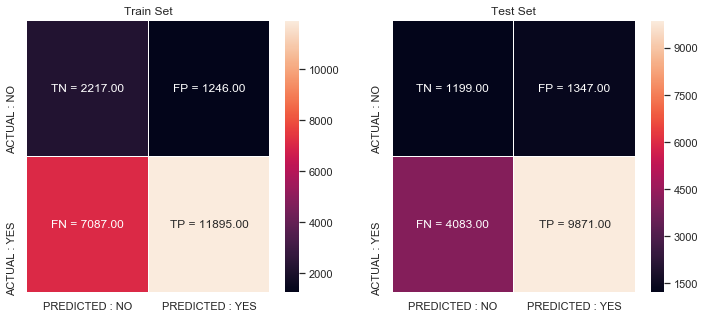

In [154]:
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [155]:
BOW_essay_text=text_bow_essays_test.todense()
print(BOW_essay_text.shape)
len(bow_eassay_feature)

(16500, 8869)


8869

In [156]:
y_test_data = list(y_test[::])
len(y_test_data)

16500

In [157]:
FP_index = []
FP_count = 0

for i in range(len(y_test_pred)):
    if y_test_data[i] == 0 and y_test_pred[i] <= 0.9:
        FP_index.append(i)
        FP_count = FP_count + 1 
    else :
        pass
print(FP_count)

2326


In [158]:
FP_index[0:10]

[0, 3, 9, 14, 15, 20, 23, 26, 43, 51]

In [160]:
df1 = pd.DataFrame(BOW_essay_text) 

df1_final = df1.iloc[FP_index,:]
print(df1_final.shape)

(2326, 8869)


In [161]:
best_indices = []

for j in range(8869):    
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue  
len(best_indices)

566

In [162]:
best_indices[0:10] 

[3, 45, 105, 161, 162, 163, 182, 183, 194, 234]

In [163]:
fp_words = []

for a in best_indices :
    fp_words.append(str(BOW_feature[a]))

fp_words[0:10]

['Music_Arts', 'SD', '11', '32', '320', '33', '44', '45', '51', '82']

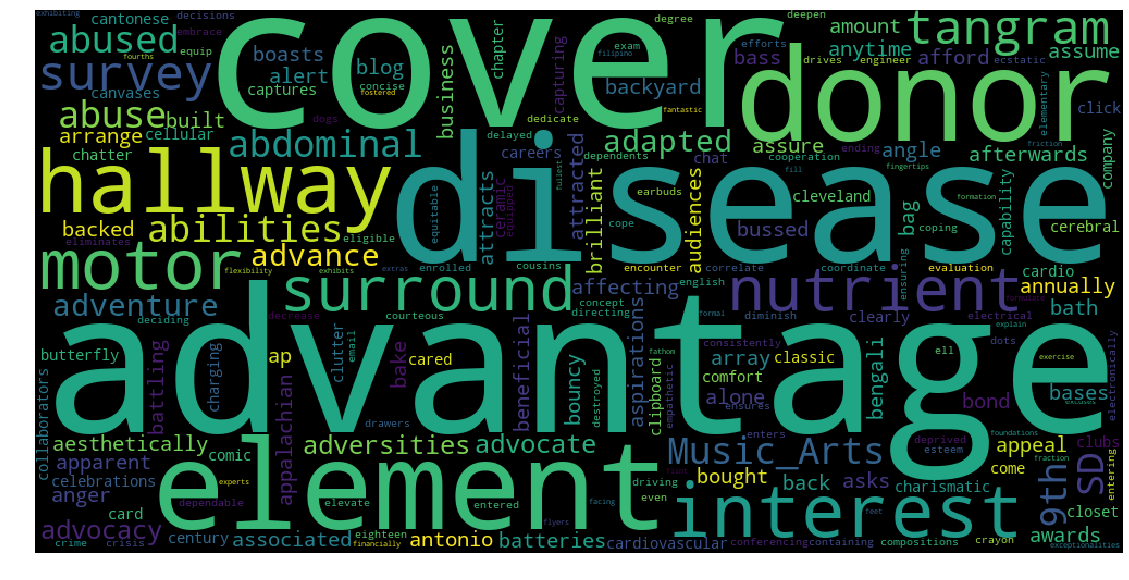

In [164]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
#convert list to string and generate
words_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [165]:
df = pd.DataFrame(x_test['price'])
print(df.head(2))

    price
0  337.18
1   89.49


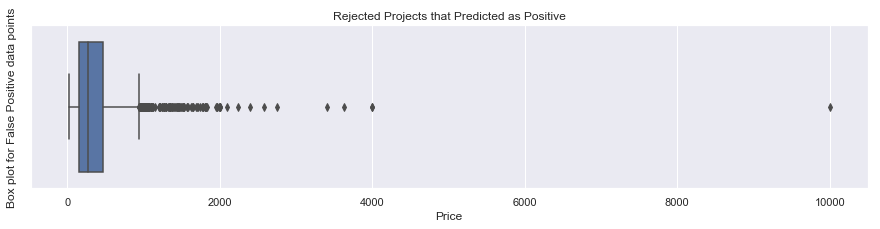

In [167]:
plt.figure(figsize=(15,3))
df1 = df.iloc[FP_index, : ]
sea.boxplot(df1.values)
plt.title("Rejected Projects that Predicted as Positive")
plt.ylabel("Box plot for False Positive data points")
plt.xlabel("Price")
plt.show()

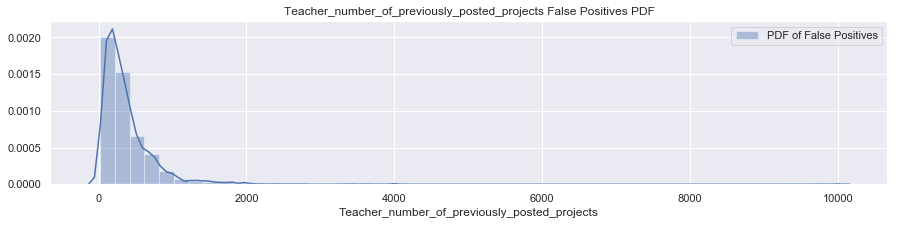

In [168]:
plt.figure(figsize=(15,3))
sns.distplot(df1.values, label="PDF of False Positives")
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [169]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train5 = hstack((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,
                  train_grade_one_hot,train_teacher_prefix_one_hot,tfidf_essay_train,
                  text_tfidf_title_train, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train5.shape, y_train.shape)
print(type(X_train5))

(22445, 10205) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [170]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv5 = hstack((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,
               cv_grade_one_hot,cv_teacher_prefix_one_hot,tfidf_essay_cv,
               text_tfidf_title_cv, cv_quantity_standar,
               cv_prev_proj_standar, cv_price_standar, cv_title_word_count_standar, 
               cv_essay_word_count_standar, cv_positive_standar, cv_negitive_standar,
               cv_neutral_standar)).tocsr()
print(X_cv5.shape, y_cv.shape)
print(type(X_cv5))

(11055, 10205) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [171]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test5 = hstack((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,
                  test_grade_one_hot,test_teacher_prefix_one_hot,text_tfidf_title_test,
                  tfidf_essay_test, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_title_word_count_standar, 
                  test_essay_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test5.shape, y_test.shape)
print(type(X_test5))

(16500, 10205) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [172]:
#https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn
def selectKImportance(model, X, k=5):
     return X[:,model.feature_importances_.argsort()[::-1][:k]]

In [173]:
X_train_best5k=selectKImportance(classifier,X_train5,5000)
X_test_best5k=selectKImportance(classifier,X_test5,5000)
X_cv_best5k=selectKImportance(classifier,X_cv5,5000)

In [174]:
print(X_train_best5k.shape)
print(X_test_best5k.shape)
print(X_cv_best5k.shape)

(22445, 707)
(16500, 707)
(11055, 707)


In [175]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

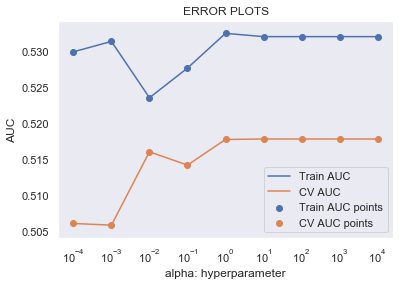

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier

train_auc = []
cv_auc = []
alpha= [10**-4, 10**-3, 10**-2, 10**-1, 1 , 10**1, 10**2, 10**3, 10**4]
for i in alpha:
    model = SGDClassifier(alpha=i,loss='hinge', penalty='l2',random_state=0)
    model.fit(X_train_best5k, y_train)

    y_train_pred = model.decision_function(X_train_best5k)    
    y_cv_pred = model.decision_function(X_cv_best5k)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xscale('log')
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

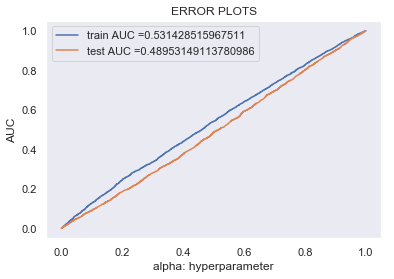

In [182]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model=SGDClassifier(alpha=0.001,loss='hinge', penalty='l2',random_state=0)
model.fit(X_train_best5k, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.decision_function(X_train_best5k)    
y_test_pred = model.decision_function(X_test_best5k)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.2724101617858681 for threshold 1.018
the maximum value of tpr*(1-fpr) 0.24348591900150884 for threshold 1.018


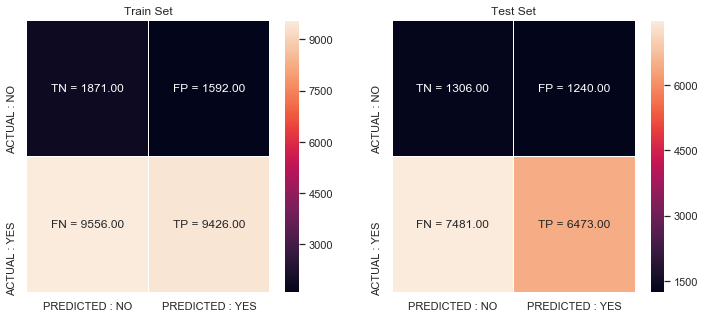

In [183]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h1>3. Conclusion</h1>

In [189]:
from prettytable import PrettyTable  
x = PrettyTable()
x.field_names = ["Vectorizer","Model","max_depth","min_samples_split","Train AUC","Test AUC"]


x.add_row(["BOW","Decision Tree","10","500","0.72","0.60"])

x.add_row(["TFIDF","Decision Tree","5","500","0.75","0.60 "])

x.add_row(["AVGW2V","Decision Tree","5","500","0.68","0.63"])

x.add_row(["TFIF-w2V","Decision Tree","5","500 ","0.68","0.63 "])

x.add_row(["SET5","Using  best 5k feature","best aplha=0.001"," ","0.53","0.48"])
print(x)

+------------+------------------------+------------------+-------------------+-----------+----------+
| Vectorizer |         Model          |    max_depth     | min_samples_split | Train AUC | Test AUC |
+------------+------------------------+------------------+-------------------+-----------+----------+
|    BOW     |     Decision Tree      |        10        |        500        |    0.72   |   0.60   |
|   TFIDF    |     Decision Tree      |        5         |        500        |    0.75   |  0.60    |
|   AVGW2V   |     Decision Tree      |        5         |        500        |    0.68   |   0.63   |
|  TFIF-w2V  |     Decision Tree      |        5         |        500        |    0.68   |  0.63    |
|    SET5    | Using  best 5k feature | best aplha=0.001 |                   |    0.53   |   0.48   |
+------------+------------------------+------------------+-------------------+-----------+----------+


Decision trees are easy to interpret and visualize.
It can easily capture Non-linear patterns.
It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.